# Housing Data

In this Exploratory Data Anaysis paper, we are going to do Exploratory data analysis of a housing dataset of California Housing Prices which you can access  [here](https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv "Title").

>We have some features of the data set as follows:
> * longitude:
     * The longitude measure of the house, a higher value is farther west.
> * latitude:
     * The latitude measure of the house, a higher value is farther north.
> * housing_median_age:
     * Median age of a house within a block; a lower number is a newer building
> * total_rooms:
     * Total number of rooms within a block.
> * total_bedrooms:
     * Total number of bedrooms within a block.
> * population:
     * Total number of people residing within a block
> * households:
     * Total number of households, a group of people residing within a home unit, for a block
> * median_income:
     *  Median income for households within a block of houses (measured in tens of thousands of US Dollars).
> * median_house_value:
     *  Median house value for households within a block (measured in US Dollars)
> * ocean_proximity:
     * Location of the house w.r.t ocean/sea.

Since we know all the parameters and there meanings, we need to know our data we need to understand whether they all come under same scale or we need to change the scale in order to get some useful insights.

To know the type of all the parameters, we can use a function `ds.dtypes()` but before that we need to import useful libraries like `pandas` , `numpy` and upload the data set in our notebook. 

We will be importing the libraries along the way as we require.

In [1]:
import pandas as pd
import numpy as np

Now that we have imported `pandas` library, we can use `read_csv` function to read our `.csv` file containg the housing dataset.

In [2]:
ds=pd.read_csv('housing.csv')

To see the top of the data set like any number of rows from the top, we use the `.head()` method,
                   
                   DataFrame.head(n=5)
                  
We can pass any integer as we like, even we don't pass any value it will show 5 elements from the top by default.


In [3]:
ds.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Now we want to see quickly some stats about our data, like `count` of values each parameter has, `mean` of all the values of each parameter, `Standard Deviation` of the values of each parameter, and many more.For that we will be using a very amazing method provided `pandas` library that is `describe()`.

In [4]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Here we can see clearly some of the statistical values of our data that can help us have an insight on the data.

What can we grab from these statistical measures? Well first of them is count which shows the number of values an attribute 
comprises.
What information can we get from count, well we can see if any of the attribute has some Null values or not.

We have count of each variable as follows:




| Attribute | Count |
|---|---|
| longitude | 20640 |
| latitude | 20640 |
| housing_median_age | 20640 |
| total_rooms | 20640 |
| total_bedrooms | 20433 |
| population | 	20640 |
| households | 20640 |
| median_income | 20640 |
| median_house_value | 20640 |

As the above table suggest, We have the highest count of 20640 and many attributes like `longitude`, `latitude`, `housing_median_age`,
`total_rooms`, `population`, `households`, `median_income`, `median_house_value` have values for every row/tuple.
But the attribute `total_bedrooms` have count of 20433 which is obviously less than 20640, so it shows `total_bedrooms` have some null values.

We can also viualize the missing values using the `missingno` library in python.

<AxesSubplot:>

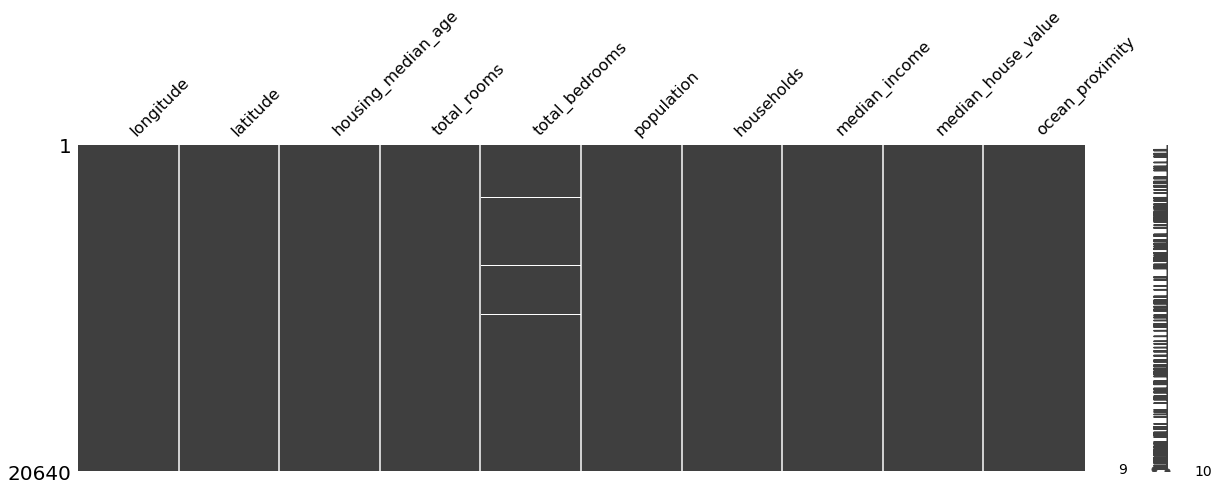

In [5]:
import missingno as mno
mno.matrix(ds, figsize = (20, 6))

We can see some white strips on the `total_bedrooms` column, it indicates the missing values.

## Handling Missing Data

Now that we know `total_bedrooms` have some null values, we need to fix it, This fixing of data comes under the cleaning which is a step of preprocessing.

So how to Handle the missing data?

For that we have some techniques.
* Remove the feature in which Null values are present, not a good idea because we don't know how important that feature may be for predicting the target variable.We  can go for it if we know the there is no relation between target variable and the this feature.
* Remove the tuples/rows in which the values are missing, again not a good idea as we will be losing a good amount of data in this process.
* We can impute the missing values or you can say fill up the missing values with a constant value that can be 0, mean(of the feature values), median(of the feature values) or mode(of the feature values), or any other value. It is easy but not always good because it may change the behaviour of the feature.
* We use regression to impute the missing values that is we can train a model using other feature to predict the missing values, it is good, we will be using this approch to handle our missing values.


But before that we have to make the data into numbers, that is we have to do label encoding if any of the columns are in string form, we have `ocean_proximity` which categorical and in string form, we need to change it to numbers by `Label Encoding` 

In [6]:
from sklearn.preprocessing import LabelEncoder
ds.loc[:,['ocean_proximity']] = LabelEncoder().fit_transform(ds['ocean_proximity'])
ds


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


Now we have all the features in numbers

We are going to train our a `LinearRegression` model with features `longitude`, `latitude`, `housing_median_age`,
`total_rooms`, `population`, `households`, `median_income`, `median_house_value` to predict the missing values in feature `total_bedrooms`.

## Mini Model for filling missing values

In the code below we dropped all the rows having `NaN` value for `total_bedrooms`

In [7]:
miss_train=ds.dropna(subset=['total_bedrooms'])
miss_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


Now we are creating `miss_train_X`(which contains all the features except `total_bedrooms`) with which we are going to train this model.

In [8]:
miss_train_X = miss_train.drop(columns=['total_bedrooms'])
miss_train_X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,1


And a target `miss_train_y` which only contains  `total_bedrooms`.

In [9]:
miss_train_y = miss_train['total_bedrooms']
miss_train_y

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20433, dtype: float64

We are checking the shape of `miss_train_y` for future reference.

In [10]:
miss_train_y.shape

(20433,)

For testing we have the rows of ds for which the `total_bedrooms` feature has `NaN` value.

In [11]:
miss_test=ds[ds.total_bedrooms.isnull()].drop(columns=['total_bedrooms'])
miss_test

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,3
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,3
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,3
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,3
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,3
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,220500.0,4
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,167400.0,4
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,410700.0,0
20460,-118.75,34.29,17.0,5512.0,2734.0,814.0,6.6073,258100.0,0


We have our data in hand with train and test sets and all values in numbers, we are now ready to do some math.

But before that we have to make sure our all the columns have same range, otherwise it won't work well.  

To scale down all the feature in same range, we can use a method `StandardScaler` form `preprocessing` library of sklearn module.

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
miss_train_X=sc.fit_transform(miss_train_X)
miss_train_y=np.array(miss_train_y).reshape(-1,1)
miss_train_y=sc.fit_transform(miss_train_y)



c:\users\91971\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We had to reshape the `miss_train_y` to fit StandardScaler to it.

Remember we checked the shape of the `miss_train_y`, here we are using it to again reshape in the same shape as before.

In [13]:
miss_train_y = miss_train_y.reshape(20433,)

Finally We have everything ready, we are now going to train our `LinearRegression` model to predict the missing values.

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(miss_train_X,miss_train_y)

LinearRegression()

Our `LinearRegression` model is trained and ready to predict.So we are going to predict the null values using `miss_test`.

In [15]:
miss_test=sc.fit_transform(miss_test)

In [16]:
missing_bedrooms=lr.predict(miss_test)
missing_bedrooms

array([-0.82029618, -0.67321497,  1.80795725, -1.01623112, -0.97114937,
        0.11934179,  0.32695463,  1.33423326,  0.12663487,  0.06130956,
        0.34942273, -0.39172463,  2.04291221,  1.20191274,  0.21735752,
       -0.67432527, -0.56514411, -0.68968574, -0.67836618,  0.52741811,
       -0.63280758, -1.13501513, -1.60069279,  0.2174317 , -0.29186761,
        1.22294385,  0.54956749,  0.10972229,  2.1481604 ,  0.08463903,
        0.59944232,  2.54553891,  2.0093496 , -0.28568523,  0.19091265,
       -0.90219925,  0.06624299, -0.62492362, -0.55548732,  0.4799312 ,
       -0.33960126, -0.27015199, -0.6228606 ,  1.2528246 ,  0.26166591,
        2.07022877, -0.27649702,  0.04865315, -0.91346044, -0.58066797,
       -0.02281894, -0.61419581, -0.59528694,  0.72680343, -0.69691784,
       -0.08547907, -0.62521254, -0.24060638,  0.66804357, -0.14682886,
       -0.4902318 , -0.53742258,  0.12154837, -0.45020848,  0.62431018,
        0.00928124, -0.0748072 , -0.31175977,  1.76051056, -0.09

We have the missing values!😃

But wait how are we going to put the missing values in our original DataFrame `ds`?

For that we will be using a Dictionary.

>**If you don't know how can we fill the missing values using dictionary, here is a small explanation:**
When filling missing values using a dictionary,it will match the key of the dictionary and the index of the missing values, if it finds the same key as the index of one of the missing value, it will fill the missing value with the value corresponding to the key. The keys act like indices and the values act like the values we want to put in the missing places.
>>    for example:
       if dict={1:'a',5:'e',8:'f'}
     and we want to will fill the missing values in indices 1,5, and 8, it will fill the values but if the keys of              dictionary and the indices of the mising values does not match, it will only fill the values for which it  is         matching.
     

Now we need to have the index of the missing values in order to fill the missing values

In [17]:
index_of_missing=list(ds[ds.total_bedrooms.isnull()].reset_index()['index'])

We are creating a Dictionary using for loop which has all the values with the keys as there index in original DataFrame `ds`

In [18]:
miss_bedrooms_dict={}
for i in index_of_missing:
        miss_bedrooms_dict[i] = missing_bedrooms[index_of_missing.index(i)]
print(miss_bedrooms_dict)

{290: -0.8202961844680018, 341: -0.6732149665403149, 538: 1.8079572517599483, 563: -1.016231120578889, 696: -0.9711493672776927, 738: 0.11934178594944533, 1097: 0.3269546270165521, 1350: 1.3342332591900763, 1456: 0.1266348721186397, 1493: 0.06130956196670897, 1606: 0.3494227304487266, 2028: -0.39172463022736087, 2115: 2.042912213085495, 2301: 1.2019127372433966, 2323: 0.2173575161133071, 2334: -0.6743252674488714, 2351: -0.5651441125434906, 2412: -0.6896857442394286, 2420: -0.678366184932733, 2578: 0.5274181050798665, 2608: -0.6328075829899218, 2647: -1.135015126424196, 2826: -1.6006927869131449, 3024: 0.21743169503060933, 3328: -0.2918676108378124, 3354: 1.2229438467907054, 3376: 0.5495674926722361, 3482: 0.109722291274449, 3485: 2.148160395243477, 3529: 0.08463902724995781, 3721: 0.5994423159966132, 3778: 2.545538908531226, 3912: 2.0093495992715167, 3921: -0.2856852255768136, 3958: 0.19091265006446728, 4043: -0.9021992471058263, 4046: 0.0662429903960703, 4186: -0.6249236178733405, 42

We have the dictionary `miss_bedrooms_dict`, We can fill the missing values, But before that we have to scale down the features in ds, because we have missing values already scaled down.

In [19]:
ds=sc.fit_transform(ds)
ds=pd.DataFrame(ds,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity'])
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,1.291089
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,-0.116739


Finally filling the missing values using the Dictionary `miss_bedrooms_dict`.

In [20]:
ds['total_bedrooms']=ds['total_bedrooms'].fillna(miss_bedrooms_dict)
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,1.291089
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,-0.116739


Now to visualize the missing values one more time we can plot the matrix as shown below, and there are no missing values.

<AxesSubplot:>

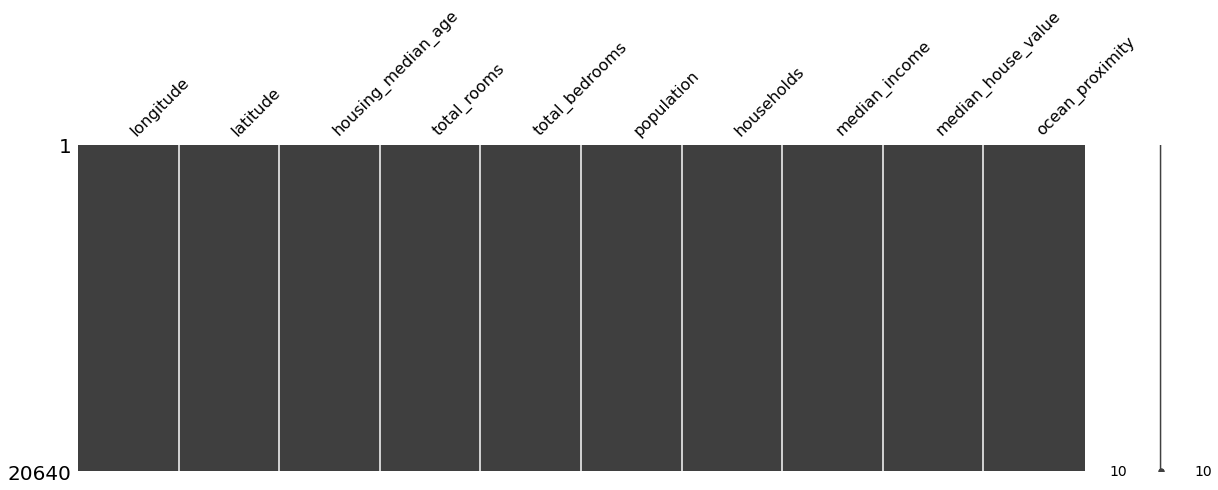

In [21]:
mno.matrix(ds, figsize = (20, 6))

## Training the LinearRegression model for `median_house_value`

Seperating **X** (Independent features) and **y**(Dependent Feature) 

In [22]:
X = ds[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.291089
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-0.116739


In [23]:
y=ds['median_house_value']
y

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: median_house_value, Length: 20640, dtype: float64

### Dimensionality Reduction

Using the below code we can check the Feature importance.
That is how important a feature is, or how much an independent feature is affecting the target/dependent feature.

Feature: 0, Score: -0.74334
Feature: 1, Score: -0.78792
Feature: 2, Score: 0.12621
Feature: 3, Score: -0.15725
Feature: 4, Score: 0.41973
Feature: 5, Score: -0.37712
Feature: 6, Score: 0.15596
Feature: 7, Score: 0.66320
Feature: 8, Score: 0.00046


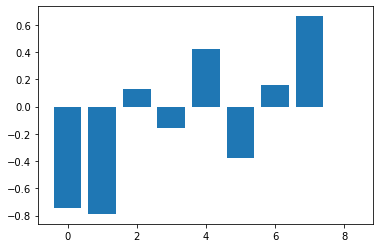

In [24]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

We the above analysis we have concluded that features  `ocean_proximity` have very less importance. So we have decided to drop these features.

In [25]:
X=ds[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]

In [26]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583


In [27]:
y

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: median_house_value, Length: 20640, dtype: float64

Splitting X and y into `X_train`, `X_test`, `y_train`, `y_test`.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=225)

Fitting a `LinearRegression` model 

In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR

LinearRegression()

In [30]:
LR.fit(X_train,y_train)

LinearRegression()

Predicting the `X_test` values and storing those values in variable `y_predict`

In [31]:
y_predict=LR.predict(X_test)
y_predict

array([ 0.57503152, -0.5177451 , -0.56504193, ..., -0.26961845,
       -0.58536093, -0.38201   ])

Checking Mean Squared Error using the method `mean_squared_error` from `metrics` library

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

0.3492120627702268

Testing Accuracy of or model using `score` method.

In [33]:
r2_score = LR.score(X_test,y_test)
print(r2_score*100,'%')

65.39316054604183 %


## Deploying Our model using `Gradio`.

In [34]:
import gradio as gr

In [35]:
def get_value(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income):
    list1=[[longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income]]
    pred=LR.predict(list1)
    value=pred[0]
    output='$'+str(value*115392.82040257193+206855.8168826367)
    return output


gr.Interface(fn=get_value, inputs=[ gr.inputs.Slider(-3, 3),gr.inputs.Slider(-3, 3),'number',gr.inputs.Slider(0, 20),gr.inputs.Slider(0, 20),gr.inputs.Slider(0, 50),gr.inputs.Slider(0,20),"number"], outputs="number").launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://14171.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://14171.gradio.app')

c:\users\91971\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
